In [40]:
import pandas as pd
import numpy as np
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import numpy as np
warnings.filterwarnings("ignore")

In [41]:
import pandas as pd
file_path = 'D:\FREELANCE_PROJECTS\diabetes-client-readmit-prediction\data\diabetic_data.csv'
data = pd.read_csv(file_path)

In [42]:
data.shape

(101766, 50)

In [43]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [44]:
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

(None,
    encounter_id  patient_nbr             race  gender      age weight  \
 0       2278392      8222157        Caucasian  Female   [0-10)      ?   
 1        149190     55629189        Caucasian  Female  [10-20)      ?   
 2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
 3        500364     82442376        Caucasian    Male  [30-40)      ?   
 4         16680     42519267        Caucasian    Male  [40-50)      ?   
 
    admission_type_id  discharge_disposition_id  admission_source_id  \
 0                  6                        25                    1   
 1                  1                         1                    7   
 2                  1                         1                    7   
 3                  1                         1                    7   
 4                  1                         1                    7   
 
    time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
 0                 1  ...          No      

In [45]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [46]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [47]:
columns_to_drop = ['encounter_id', 'patient_nbr', 'payer_code', 'medical_specialty']
data.drop(columns=columns_to_drop, inplace=True)

In [48]:
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [49]:
threshold = 0.4
missing_percentages = data.isnull().mean()
columns_to_drop_due_to_missing = missing_percentages[missing_percentages > threshold].index
data.drop(columns=columns_to_drop_due_to_missing, inplace=True)

In [50]:
data.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide   

In [51]:
data["readmitted"].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [52]:
# data['readmitted'] = data['readmitted'].map({'NO': 0, '>30': 1, '<30': 2})
data['readmitted'] = data['readmitted'].apply(lambda x: 1 if x == '<30' or x == '>30' else 0)

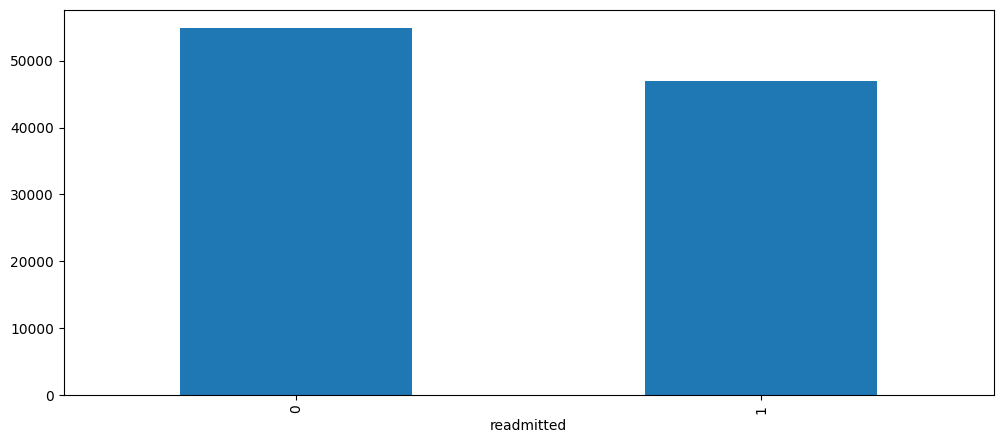

In [53]:
data['readmitted'].value_counts().plot.bar(figsize=(12, 5));

In [54]:
data.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [55]:
ordinal_mappings =  {
    'age': {
        '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, 
        '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9
    }}

data['age'] = data['age'].map(ordinal_mappings['age'])

In [56]:
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,0,?,6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,1,?,1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,Female,2,?,1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,3,?,1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,4,?,1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [57]:
data["weight"].value_counts()

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

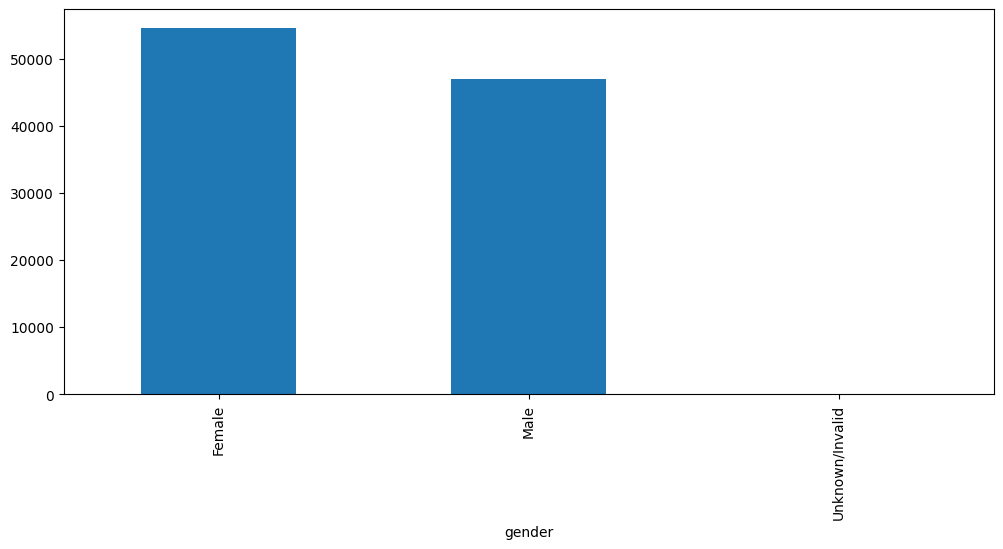

In [58]:
data["gender"].value_counts().plot.bar(figsize=(12, 5));

In [59]:
data["readmitted"].value_counts()

readmitted
0    54864
1    46902
Name: count, dtype: int64

In [60]:
data["gender"] = data["gender"].apply(lambda x: 1 if x=="Male" else 0)

In [61]:
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,0,0,?,6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,0,1,?,1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,0,2,?,1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,1,3,?,1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,1,4,?,1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [62]:
data["change"].unique(), data["change"].value_counts()

(array(['No', 'Ch'], dtype=object),
 change
 No    54755
 Ch    47011
 Name: count, dtype: int64)

In [63]:
data["change"] = data["change"].apply(lambda x: 1 if x=='Ch' else 0)

In [64]:
data["readmitted"].value_counts()

readmitted
0    54864
1    46902
Name: count, dtype: int64

In [65]:
new_data = data[['age', 
      'gender', 
      'time_in_hospital', 
      'num_lab_procedures', 
      'num_procedures', 
      'num_medications', 
      'number_outpatient', 
      'number_emergency', 
      'number_inpatient', 
      'number_diagnoses',
     'change',
    'readmitted']]

In [66]:
new_data.dtypes

age                   int64
gender                int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
change                int64
readmitted            int64
dtype: object

In [67]:
new_data.isnull().sum()

age                   0
gender                0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
change                0
readmitted            0
dtype: int64

In [68]:
new_data[new_data["readmitted"] == 1]

,age,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,readmitted
1,1,0,3,59,0,18,0,0,0,9,1,1
5,5,1,3,31,6,16,0,0,0,9,0,1
7,7,1,5,73,0,12,0,0,0,8,0,1
10,4,0,9,47,2,17,0,0,0,9,0,1
11,6,1,7,62,0,11,0,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101754,7,0,9,50,2,33,0,0,0,9,1,1
101755,4,0,14,73,6,26,0,1,0,9,1,1
101756,6,0,2,46,6,17,1,1,1,9,0,1
101760,6,0,6,45,1,25,3,1,2,9,1,1


In [69]:
new_data.dtypes

age                   int64
gender                int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
change                int64
readmitted            int64
dtype: object

In [70]:
X = new_data.drop("readmitted", axis=1)
y = new_data["readmitted"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.head()

,age,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change
24079,7,0,4,48,0,11,0,0,0,9,0
98079,5,1,1,42,0,5,0,0,0,6,0
6237,8,1,4,44,0,10,0,0,0,7,0
72208,8,1,3,54,0,8,0,0,0,8,1
33075,7,0,11,35,3,23,0,0,1,8,0


In [72]:
from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

clf_report = classification_report(y_test, y_pred)
print(f"LogisticRegression: {clf_report}")
print("---------------------------------------")
print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")

LogisticRegression:               precision    recall  f1-score   support

           0       0.61      0.81      0.69     10952
           1       0.64      0.39      0.48      9402

    accuracy                           0.62     20354
   macro avg       0.62      0.60      0.59     20354
weighted avg       0.62      0.62      0.60     20354

---------------------------------------
accuracy_score: 0.6154564213422423


In [74]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_clr = classification_report(y_test, xgb_pred)
accuracy = accuracy_score(y_test, xgb_pred)
print(f"RandomForestClassifier: {xgb_clr}")
print("---------------------------------------")
print(f"accuracy_score: {accuracy_score(y_test, xgb_pred)}")

RandomForestClassifier:               precision    recall  f1-score   support

           0       0.63      0.74      0.68     10952
           1       0.61      0.49      0.54      9402

    accuracy                           0.62     20354
   macro avg       0.62      0.61      0.61     20354
weighted avg       0.62      0.62      0.61     20354

---------------------------------------
accuracy_score: 0.6207625036847794


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

tuned_report = classification_report(y_test, y_pred_tuned)

In [83]:
print(tuned_report)
accuracy_rf = accuracy_score(y_test, y_pred_tuned)
print(accuracy_rf)

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     10952
           1       0.62      0.49      0.55      9402

    accuracy                           0.62     20354
   macro avg       0.62      0.62      0.61     20354
weighted avg       0.62      0.62      0.62     20354

0.6248403262258033


In [37]:
new_data.head()

,age,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,readmitted
0,0,0,1,41,0,1,0,0,0,1,0,0
1,1,0,3,59,0,18,0,0,0,9,1,1
2,2,0,2,11,5,13,2,0,1,6,0,0
3,3,1,2,44,1,16,0,0,0,7,1,0
4,4,1,1,51,0,8,0,0,0,5,1,0
